# Publishing web maps and web scenes

An ArcGIS web map is an interactive display of geographic information through a composition of web layers, basemap and much more. A web scene is analogous to a web map but in the 3D space. To get an overview, visit the product documentation for [web maps](http://doc.arcgis.com/en/arcgis-online/reference/what-is-web-map.htm) and [web scenes](http://doc.arcgis.com/en/arcgis-online/reference/what-is-web-scene.htm).

This sample demonstrates how to create and publish simple examples of web maps and scenes using the Python API. If you are interested in learning more about the specification to author and publish complex and more illustrative maps, refer to this [documentation](https://developers.arcgis.com/web-map-specification/).

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Publishing-web-maps-and-web-scenes" data-toc-modified-id="Publishing-web-maps-and-web-scenes-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Publishing web maps and web scenes</a></span></li><li><span><a href="#Publish-a-web-map" data-toc-modified-id="Publish-a-web-map-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Publish a web map</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Add-an-operational-layer-to-the-web-map" data-toc-modified-id="Add-an-operational-layer-to-the-web-map-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Add an operational layer to the web map</a></span></li><li><span><a href="#Publish-the-web-map-as-an-item-to-the-portal" data-toc-modified-id="Publish-the-web-map-as-an-item-to-the-portal-2.0.2"><span class="toc-item-num">2.0.2&nbsp;&nbsp;</span>Publish the web map as an item to the portal</a></span></li><li><span><a href="#Display-the-web-map" data-toc-modified-id="Display-the-web-map-2.0.3"><span class="toc-item-num">2.0.3&nbsp;&nbsp;</span>Display the web map</a></span></li></ul></li></ul></li><li><span><a href="#Publish-a-web-scene" data-toc-modified-id="Publish-a-web-scene-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Publish a web scene</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Publish-the-web-scene-as-an-item-to-the-portal" data-toc-modified-id="Publish-the-web-scene-as-an-item-to-the-portal-3.0.1"><span class="toc-item-num">3.0.1&nbsp;&nbsp;</span>Publish the web scene as an item to the portal</a></span></li><li><span><a href="#Display-the-web-scene" data-toc-modified-id="Display-the-web-scene-3.0.2"><span class="toc-item-num">3.0.2&nbsp;&nbsp;</span>Display the web scene</a></span></li></ul></li></ul></li></ul></div>

In [1]:
import os
import json
from IPython.display import display
import arcgis
from arcgis.gis import GIS
from arcgis.mapping import WebMap, WebScene


In [2]:
# connect to your GIS
# Create a connection to ArcGIS Online to search for contents
gis1 = GIS(profile="your_online_profile")
# Create a connection to your portal for publishing
gis2 = GIS(profile="your_enterprise_profile")

# Publish a web map
The ArcGIS API for Python extends the `WebMap` class with the capability to author new web maps and edit existing ones. You can perform basic operations such as adding, and removing layers.

In [21]:
# Create an empty web map with a default basemap
wm = WebMap()
wm.definition

{
  "operationalLayers": [],
  "baseMap": {
    "baseMapLayers": [
      {
        "id": "world-hillshade-layer",
        "url": "https://services.arcgisonline.com/arcgis/rest/services/Elevation/World_Hillshade/MapServer",
        "layerType": "ArcGISTiledMapServiceLayer",
        "title": "World Hillshade",
        "showLegend": false,
        "visibility": true,
        "opacity": 1
      },
      {
        "id": "topo-vector-base-layer",
        "styleUrl": "https://www.arcgis.com/sharing/rest/content/items/7dc6cea0b1764a1f9af2e679f642f0f5/resources/styles/root.json",
        "layerType": "VectorTileLayer",
        "title": "World Topo",
        "visibility": true,
        "opacity": 1
      }
    ],
    "title": "Topographic Vector"
  },
  "spatialReference": {
    "wkid": 102100,
    "latestWkid": 3857
  },
  "version": "2.10",
  "authoringApp": "ArcGISPythonAPI",
  "authoringAppVersion": "2.3.0.1"
}

The above represents a template of a simple web map. This web map consists of a basemap web layer and an array of operational web layers. Notice the opertaional layer is empty without any web layer urls. We will search for a public web layer titled **USA 2020 Census Housing Characteristics - Legislative Geographies** published by **esri_demographics** account and apply that as an operational layer for this web map.

In [16]:
search_result = gis1.content.search("title:USA 2020 Census Housing Characteristics - Legislative Geographies and owner:esri_demographics", outside_org = True)

In [17]:
display(search_result)

[<Item title:"USA 2020 Census Housing Characteristics - Legislative Geographies" type:Feature Layer Collection owner:esri_demographics>,
 <Item title:"USA 2020 Census Race and Ethnicity Characteristics - Legislative Geographies" type:Feature Layer Collection owner:esri_demographics>,
 <Item title:"USA 2020 Census Household Characteristics - Legislative Geographies" type:Feature Layer Collection owner:esri_demographics>,
 <Item title:"USA 2020 Census Age and Sex Characteristics - Legislative Geographies" type:Feature Layer Collection owner:esri_demographics>,
 <Item title:"USA 2020 Census Population Characteristics - Legislative Geographies" type:Feature Layer Collection owner:esri_demographics>,
 <Item title:"USA 2020 Census Group Quarters Population Characteristics - Legislative Geographies" type:Feature Layer Collection owner:esri_demographics>,
 <Item title:"USA 2020 Census Household Population Characteristics - Legislative Geographies" type:Feature Layer Collection owner:esri_demog

<Item title:"USA 2020 Census Housing Characteristics - Legislative Geographies" type:Feature Layer Collection owner:esri_demographics>
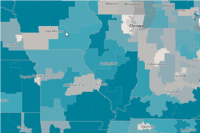

In [18]:
housing_census_legislative_item = search_result[0]
display(housing_census_legislative_item)

### Add an operational layer to the web map
To add 'USA Demographic and Housing Characteristic' web layer as an operational layer, you can call the `add_layer()` method and pass the `FeatureLayer` object.

In [19]:
#query the layers in the item
housing_census_legislative_item.layers

[<FeatureLayer url:"https://services.arcgis.com/P3ePLMYs2RVChkJx/arcgis/rest/services/USA_Census_2020_DHC_Housing_Units_Legislative/FeatureServer/0">,
 <FeatureLayer url:"https://services.arcgis.com/P3ePLMYs2RVChkJx/arcgis/rest/services/USA_Census_2020_DHC_Housing_Units_Legislative/FeatureServer/1">,
 <FeatureLayer url:"https://services.arcgis.com/P3ePLMYs2RVChkJx/arcgis/rest/services/USA_Census_2020_DHC_Housing_Units_Legislative/FeatureServer/2">,
 <FeatureLayer url:"https://services.arcgis.com/P3ePLMYs2RVChkJx/arcgis/rest/services/USA_Census_2020_DHC_Housing_Units_Legislative/FeatureServer/3">]

In [10]:
for lyr in housing_census_legislative_item.layers:
    wm.add_layer(lyr)

In [13]:
for lyr in wm.layers:
    print(lyr.title)

Nation
Congressional District
State Legislative Districts Upper
State Legislative Districts Lower


### Publish the web map as an item to the portal
Now that the web map content is ready, we will use the `save()` method to save the `WebMap` object as a web map item in the GIS. As parameters to the `save()` method, you need to specify some essential properties for the new web map item.

In [26]:
web_map_properties = {'title':'USA 2020 Census Housing Characteristics - Legislative Geographies',
                     'snippet':'This map service shows Demographic and Housing Characteristics information' +\
                     'in the United States as of 2020 census.',
                     'tags':'ArcGIS Python API'}

# Call the save() with web map item's properties.
web_map_item = wm.save(item_properties=web_map_properties)
web_map_item

<Item title:"USA 2020 Census Housing Characteristics - Legislative Geographies" type:Web Map owner:api_data_owner>

### Display the web map
We have successfully published a web map with consisting of a basemap and desired web layer as the operational layer. We will read the published map as a `WebMap` object and interact with it.


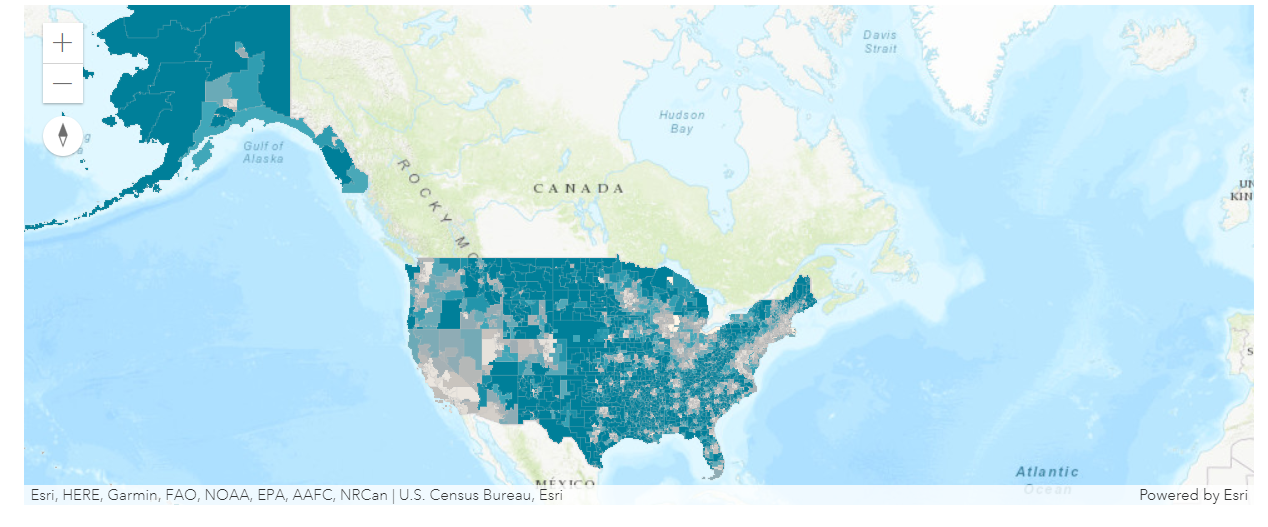

In [15]:
web_map_obj = WebMap(web_map_item)

# display the web map in an interactive widget
web_map_obj

# Publish a web scene
So far, we have seen how to publish a web map. In this section, we will observe how to publish a web scene. We will read a template web scene json from a text file, add an interesting 3D Scene Service as an operational layer. Then using the `add()` method, we will publish this as a web scene item.

In [3]:
# Read sample web scene json from text file. We use built-in json module to parse it into a Python dictionary
web_scene_dict = dict()
with open("data/web_scene_simple.json","r") as file_handle:
    web_scene_dict = json.load(file_handle)

display(web_scene_dict)

{'operationalLayers': [{'itemId': '',
   'title': '',
   'visibility': True,
   'opacity': 1,
   'url': '',
   'layerType': ''}],
 'baseMap': {'baseMapLayers': [{'id': '933075fa973f49948a88b84dae743704',
    'visibility': True,
    'opacity': 1,
    'layerDefinition': {},
    'url': 'http://services.arcgisonline.com/ArcGIS/rest/services/World_Street_Map/MapServer',
    'layerType': 'ArcGISTiledMapServiceLayer'}],
  'title': 'World Street Map',
  'elevationLayers': [{'url': 'https://elevation3d.arcgis.com/arcgis/rest/services/WorldElevation3D/Terrain3D/ImageServer',
    'id': 'globalElevation_0',
    'layerType': 'ArcGISTiledElevationServiceLayer'}]},
 'spatialReference': {'wkid': 102100, 'latestWkid': 3857},
 'version': '1.4',
 'viewingMode': 'global',
 'tables': []}

The web scene above is pretty simple. Notice the `operationalLayers` array does not contain `url` to the service. Now we will search for a scene service titled **Buildings_Montreal** published by **esri_3d** and apply that to the web scene.

In [24]:
search_result = gis1.content.search("title:Buildings_Montreal AND owner:esri_3d", 
                                   item_type="scene service", outside_org = True)
display(search_result)

[<Item title:"Buildings_Montreal_2016" type:Scene Layer owner:esri_3d>,
 <Item title:"Buildings_Montreal" type:Scene Layer owner:esri_3d>,
 <Item title:"Montreal, Canada Buildings" type:Scene Layer owner:esri_3d>]

<Item title:"Buildings_Montreal" type:Scene Layer owner:esri_3d>
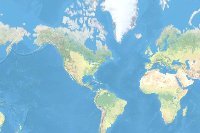

In [25]:
buildings_layer = search_result[1]
display(buildings_layer)

In [7]:
# Update web scene's opertaional layer with properties of buildings_layer
web_scene_dict['operationalLayers'][0]['itemId'] = buildings_layer.itemid
web_scene_dict['operationalLayers'][0]['layerType'] = "ArcGISSceneServiceLayer"
web_scene_dict['operationalLayers'][0]['title'] = buildings_layer.title
web_scene_dict['operationalLayers'][0]['url'] = buildings_layer.url

### Publish the web scene as an item to the portal
We will use the `add()` from `ContentManager` class to create a web scene item. As parameters we will send a dictionary containing properties of the web scene item. The `text` property will contain the web scene dictionary updated in the previous step as a string.

In [8]:
web_scene_item_properties = {'title':'Web scene with photo realistic buildings',
                            'type':'Web Scene',
                            'snippet':'This scene highlights buildings of Montreal, Canada',
                            'tags':'ArcGIS Python API',
                            'text': json.dumps(web_scene_dict)}

# Use the add() method to publish a new web scene
web_scene_item = gis2.content.add(web_scene_item_properties)
web_scene_item.sharing.sharing_level="EVERYONE"
display(web_scene_item)

<Item title:"Web scene with photo realistic buildings" type:Web Scene owner:tk_geosaurus>

### Display the web scene
We have successfully published a web scene with consisting of a basemap, elevation layer and desired web layer as the operational layer. We will read the published scene as a `WebScene` object and interact with it.

In [ ]:
web_scene_obj = WebScene(web_scene_item)

# display the interactive web scene in the notebook
web_scene_obj

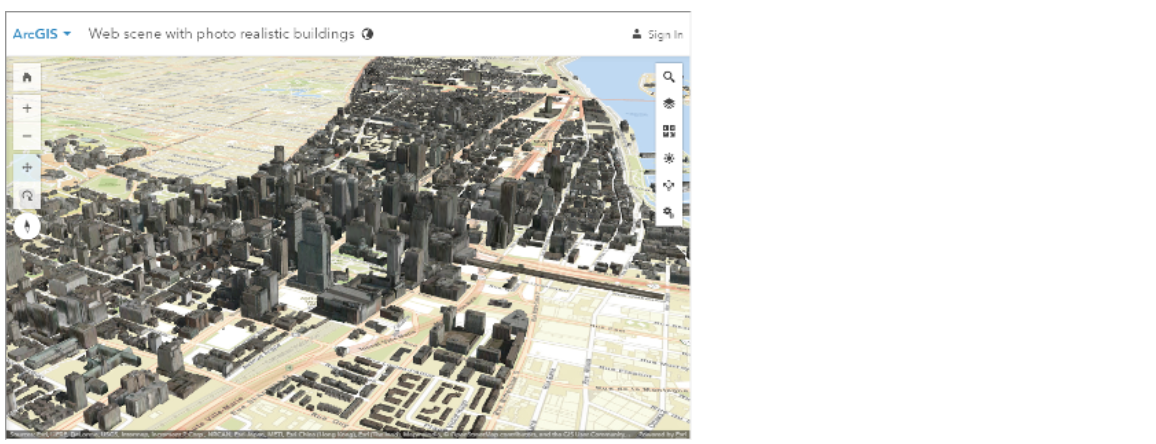